# Decorrelating your data and dimension reduction
Dimension reduction summarizes a dataset using its common occuring patterns. In this chapter, you'll learn about the most fundamental of dimension reduction techniques, "Principal Component Analysis" ("PCA"). PCA is often used before supervised learning to improve model performance and generalization. It can also be useful for unsupervised learning. For example, you'll employ a variant of PCA will allow you to cluster Wikipedia articles by their content!

# 1. Visualizing the PCA transformation
## 1.1 Correlated data in nature
You are given an array `grains` giving the width and length of samples of grain. You suspect that width and length will be correlated. To confirm this, make a scatter plot of width vs length and measure their Pearson correlation.

### Instructions:
* Import:
    * `matplotlib.pyplot` as `plt`.
    * `pearsonr` from `scipy.stats`.
* Assign column `0` of `grains` to `width` and column `1` of `grains` to `length`.
* Make a scatter plot with `width` on the x-axis and `length` on the y-axis.
* Use the `pearsonr()` function to calculate the Pearson correlation of `width` and `length`.

In [1]:
import pandas as pd

grains = pd.read_csv('_datasets/seeds-width-vs-length.csv', header=None).values

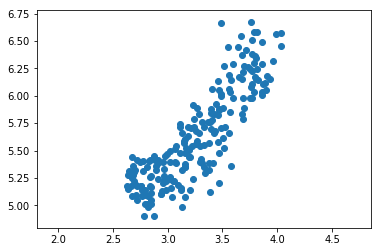

0.8604149377143467

In [2]:
# Perform the necessary imports
import matplotlib.pyplot as plt
% matplotlib inline
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
correlation

As you would expect, the width and length of the grain samples are highly correlated.

# 1.2 Decorrelating the grain measurements with PCA
You observed in the previous exercise that the width and length measurements of the grain are correlated. Now, you'll use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

### Instructions:
* Import `PCA` from `sklearn.decomposition`.
* Create an instance of `PCA` called `model`.
* Use the `.fit_transform()` method of `model` to apply the PCA transformation to `grains`. Assign the result to `pca_features`.
* The subsequent code to extract, plot, and compute the Pearson correlation of the first two columns `pca_features` has been written for you.

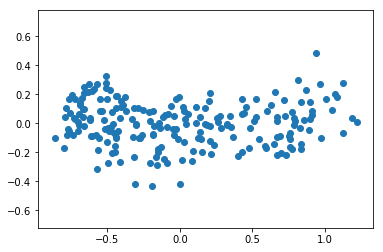

4.983104599635362e-17

In [3]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
correlation

You've successfully decorrelated the grain measurements with PCA!

## 1.3 Principal components
On the right are three scatter plots of the same point cloud. Each scatter plot shows a different set of axes (in red). In which of the plots could the axes represent the principal components of the point cloud?

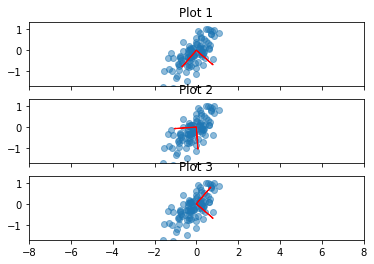

In [4]:
# generate Gaussian point cloud, centred at origin
import numpy as np
np.random.seed(1)
mean = [0, 0]
cov = np.array([[1, .75], [.75, 1]]) * 0.5
points = np.random.multivariate_normal(mean, cov, 100)

# Use PCA to determine the PCs
from sklearn.decomposition import PCA

model = PCA()
model.fit(points)

axis_sets = [model.components_]

# rotate and invert to create some alternatives
angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -1 * np.sin(angle)], [np.sin(angle), np.cos(angle)]])
rotated = model.components_.dot(rotation_matrix)
axis_sets.append(rotated)

inverted = np.array(model.components_)
inverted[0,:] *= -1
axis_sets.append(inverted)

# Make the plots
import matplotlib.pyplot as plt

num_plots = len(axis_sets)
f, axarr = plt.subplots(num_plots, sharex=True, sharey=False)
for plot_num, ax, axis_set in zip(range(1, num_plots + 1), axarr, axis_sets):
    ax.scatter(points[:,0], points[:,1], alpha=0.5)
    for vec in axis_set:
        ax.arrow(0, 0, vec[0], vec[1], color='red', width=0.015)
    ax.set_title('Plot %i' % plot_num)
    ax.axis('equal')
    ax.set_xlim([-8, 8])
plt.show()

Recall that the principal components are the directions along which the the data varies.

Possible Answers:
1. None of them.
2. Both plot 1 and plot 3.
3. Plot 2.

Answer: The principal components have to align with the axes of the point cloud. This happens in both plot 1 and plot 3. (2)

# 2. Intrinsic dimension
## 2.1 The first principal component
The first principal component of the data is the direction in which the data varies the most. In this exercise, your job is to use PCA to find the first principal component of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.

The array `grains` gives the length and width of the grain samples. PyPlot (`plt`) and `PCA` have already been imported for you.

### Instructions:
* Make a scatter plot of the grain measurements. This has been done for you.
* Create a `PCA` instance called `model`.
* Fit the model to the `grains` data.
* Extract the coordinates of the mean of the data using the `.mean_` attribute of `model`.
* Get the first principal component of `model` using the `.components_[0,:]` attribute.
* Plot the first principal component as an arrow on the scatter plot, using the `plt.arrow()` function. You have to specify the first two arguments - `mean[0]` and `mean[1]`.

In [5]:
import pandas as pd

grains = pd.read_csv('_datasets/seeds-width-vs-length.csv', header=None).values

# facilitative imports
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.decomposition import PCA

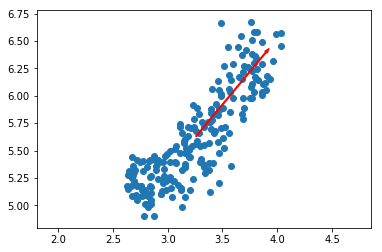

In [6]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

This is the direction in which the grain data varies the most.

## 2.2 Variance of the PCA features
The fish dataset is 6-dimensional. But what is its _intrinsic_ dimension? Make a plot of the variances of the PCA features to find out. As before, `samples` is a 2D array, where each row represents a fish. You'll need to standardize the features first.

### Instructions:
* Create an instance of `StandardScaler` called `scaler`.
* Create a `PCA` instance called `pca`.
* Use the `make_pipeline()` function to create a pipeline chaining `scaler` and `pca`.
* Use the `.fit()` method of `pipeline` to fit it to the fish samples `samples`.
* Extract the number of components used using the `.n_components_` attribute of `pca`. Place this inside a `range()` function and store the result as `features`.
* Use the `plt.bar()` function to plot the explained variances, with `features` on the x-axis and `pca.explained_variance_` on the y-axis.

In [7]:
df = pd.read_csv('_datasets/fish.csv', header=None)
samples = df[list(range(1, len(df.columns)))].values  # first column is the classes

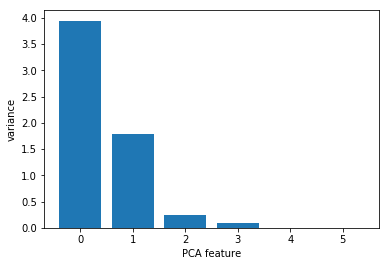

In [8]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

It looks like PCA features 0 and 1 have significant variance.

## 2.3 Intrinsic dimension of the fish data
In the previous exercise, you plotted the variance of the PCA features of the fish measurements. Looking again at your plot, what do you think would be a reasonable choice for the "intrinsic dimension" of the the fish measurements? Recall that the intrinsic dimension is the number of PCA features with significant variance.

### Possible Answers:
1. 1
2. 2
3. 5

__Answer:__  Since PCA features 0 and 1 have significant variance, the intrinsic dimension of this dataset appears to be 2.

# 3. Dimension reduction with PCA
## 3.1 Dimension reduction of the fish measurements
In a previous exercise, you saw that `2` was a reasonable choice for the "intrinsic dimension" of the fish measurements. Now use PCA for dimensionality reduction of the fish measurements, retaining only the 2 most important components.

The fish measurements have already been scaled for you, and are available as `scaled_samples`.

### Instructions:
* Import `PCA` from `sklearn.decomposition`.
* Create a PCA instance called `pca` with `n_components=2`.
* Use the `.fit()` method of `pca` to fit it to the scaled fish measurements `scaled_samples`.
* Use the `.transform()` method of `pca` to transform the `scaled_samples`. Assign the result to `pca_features`.

In [9]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = pd.read_csv('_datasets/fish.csv', header=None)
features = df[list(range(1, len(df.columns)))]  # first column is the classes

scaler = StandardScaler()
scaler.fit(features.values)
scaled_samples = scaler.transform(features.values)
scaled_samples.shape

(85, 6)

In [10]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
pca_features.shape

(85, 2)

You've successfully reduced the dimensionality from 6 to 2.

# 3.2 A tf-idf word-frequency array
In this exercise, you'll create a tf-idf word frequency array for a toy collection of documents. For this, use the `TfidfVectorizer` from sklearn. It transforms a list of documents into a word frequency array, which it outputs as a csr_matrix. It has `fit()` and `transform()` methods like other sklearn objects.

You are given a list `documents` of toy documents about pets. Its contents have been printed in the IPython Shell.

### Instructions:
* Import `TfidfVectorizer` from `sklearn.feature_extraction.text`.
* Create a `TfidfVectorizer` instance called `tfidf`.
* Apply `.fit_transform()` method of `tfidf` to `documents` and assign the result to `csr_mat`. This is a word-frequency array in csr_matrix format.
* Inspect `csr_mat` by calling its `.toarray()` method and printing the result. This has been done for you.
* The columns of the array correspond to words. Get the list of words by calling the `.get_feature_names()` method of `tfidf`, and assign the result to `words`.

In [11]:
documents = ['cats say meow',
             'dogs say woof',
             'dogs chase cats']
             
documents

['cats say meow', 'dogs say woof', 'dogs chase cats']

In [12]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
csr_mat.toarray()

array([[0.51785612, 0.        , 0.        , 0.68091856, 0.51785612,
        0.        ],
       [0.        , 0.        , 0.51785612, 0.        , 0.51785612,
        0.68091856],
       [0.51785612, 0.68091856, 0.51785612, 0.        , 0.        ,
        0.        ]])

In [13]:
# Get the words: words
words = tfidf.get_feature_names()

# Print words
words

['cats', 'chase', 'dogs', 'meow', 'say', 'woof']

You'll now move to clustering Wikipedia articles!

## 3.3 Clustering Wikipedia part I
You saw in the video that `TruncatedSVD` is able to perform PCA on sparse arrays in csr_matrix format, such as word-frequency arrays. Combine your knowledge of TruncatedSVD and k-means to cluster some popular pages from Wikipedia. In this exercise, build the pipeline. In the next exercise, you'll apply it to the word-frequency array of some Wikipedia articles.

Create a Pipeline object consisting of a TruncatedSVD followed by KMeans. (This time, we've precomputed the word-frequency matrix for you, so there's no need for a TfidfVectorizer).

The Wikipedia dataset you will be working with was obtained from [here](https://blog.lateral.io/2015/06/the-unknown-perils-of-mining-wikipedia/).

### Instructions:
* Import:
    * `TruncatedSVD` from `sklearn.decomposition`.
    * `KMeans` from `sklearn.cluster`.
    * `make_pipeline` from `sklearn.pipeline`.
* Create a `TruncatedSVD` instance called `svd` with `n_components=50`.
* Create a `KMeans` instance called `kmeans` with `n_clusters=6`.
* Create a `pipeline` called pipeline consisting of `svd` and `kmeans`.

In [14]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

Now that you have set up your pipeline, you will use it in the next exercise to cluster the articles.

## 3.4 Clustering Wikipedia part II
It is now time to put your pipeline from the previous exercise to work! You are given an array articles of tf-idf word-frequencies of some popular Wikipedia `articles`, and a list `titles` of their titles. Use your pipeline to cluster the Wikipedia articles.

A solution to the previous exercise has been pre-loaded for you, so a Pipeline `pipeline` chaining TruncatedSVD with KMeans is available.

### Instructions:
* Import `pandas` as `pd`.
* Fit the pipeline to the word-frequency array `articles`.
* Predict the cluster labels.
* Align the cluster labels with the list `titles` of article titles by creating a DataFrame `df` with `labels` and `titles` as columns. This has been done for you.
* Use the `.sort_values()` method of `df` to sort the DataFrame by the `'label'` column, and print the result.
* Hit 'Submit Answer' and take a moment to investigate your amazing clustering of Wikipedia pages!

In [15]:
from scipy.sparse import csr_matrix

df = pd.read_csv('_datasets/wikipedia-vectors.csv', index_col=0)
articles = csr_matrix(df.transpose())
titles = list(df.columns)

# a model solution to previous exercise
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

svd = TruncatedSVD(n_components=50)
kmeans = KMeans(n_clusters=6)
pipeline = make_pipeline(svd, kmeans)

In [17]:
# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
df.sort_values('label')

,label,article
37,0,Football
38,0,Neymar
30,0,France national football team
31,0,Cristiano Ronaldo
39,0,Franck Ribéry
33,0,Radamel Falcao
34,0,Zlatan Ibrahimović
35,0,Colombia national football team
32,0,Arsenal F.C.
36,0,2014 FIFA World Cup qualification


Take a look at the cluster labels and see if you can identify any patterns!